# Autoregresive NN example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data generation and plots

In [43]:
def generateData(Tc):
    N = 1000
    T = 15
    dt = T/N
    a = Tc/(Tc+dt)
    b=1-a
    
    x = np.zeros((N,1))
    t = np.zeros((N,1))
    
    for i in range(N-1):
        u = 1 if i<N/2 else 0
        x[i+1] = a*x[i]+b*u
        t[i+1] = t[i]+dt
    return t, x

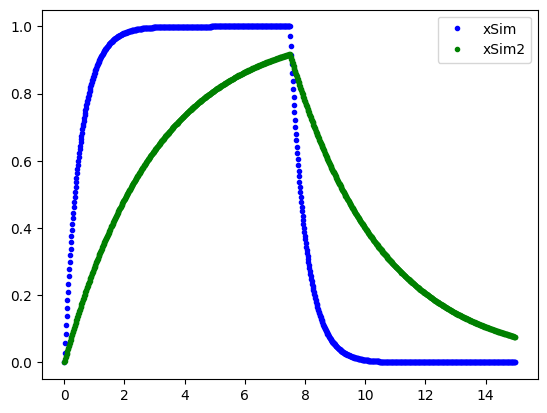

In [44]:
t, xSim = generateData(0.5)
t, xSim2 = generateData(3)
plt.plot(t,xSim,'.b', label='xSim')
plt.plot(t,xSim2,'.g',label='xSim2')
plt.legend()
plt.show()

# Preparing data for the RNN

In [45]:
def structure(data, K):
    N = len(data)
    m = np.zeros((N-K, K))
    for k in range(K):
        m[:,k] = data[k:k+N-K,0]
    x = m[:,0:K-1]
    y = m[:,K-1]
    return x, y

In [46]:
K = 10
xTrain, yTrain = structure(xSim, K)
xTest, yTest = structure(xSim2, K)

In [28]:
print(xTrain[0:20, 0:4])

[[0.         0.02912621 0.05740409 0.08485834]
 [0.02912621 0.05740409 0.08485834 0.11151295]
 [0.05740409 0.08485834 0.11151295 0.13739122]
 [0.08485834 0.11151295 0.13739122 0.16251574]
 [0.11151295 0.13739122 0.16251574 0.18690849]
 [0.13739122 0.16251574 0.18690849 0.21059077]
 [0.16251574 0.18690849 0.21059077 0.23358327]
 [0.18690849 0.21059077 0.23358327 0.25590609]
 [0.21059077 0.23358327 0.25590609 0.27757872]
 [0.23358327 0.25590609 0.27757872 0.29862012]
 [0.25590609 0.27757872 0.29862012 0.31904866]
 [0.27757872 0.29862012 0.31904866 0.33888219]
 [0.29862012 0.31904866 0.33888219 0.35813805]
 [0.31904866 0.33888219 0.35813805 0.37683306]
 [0.33888219 0.35813805 0.37683306 0.39498355]
 [0.35813805 0.37683306 0.39498355 0.41260539]
 [0.37683306 0.39498355 0.41260539 0.42971397]
 [0.39498355 0.41260539 0.42971397 0.44632425]
 [0.41260539 0.42971397 0.44632425 0.46245072]
 [0.42971397 0.44632425 0.46245072 0.4781075 ]]


In [29]:
print(yTrain[0:20])

[0.23358327 0.25590609 0.27757872 0.29862012 0.31904866 0.33888219
 0.35813805 0.37683306 0.39498355 0.41260539 0.42971397 0.44632425
 0.46245072 0.4781075  0.49330825 0.50806626 0.52239443 0.53630527
 0.54981094 0.56292325]


In [48]:
print(xTest[0:20, 0:4])

[[0.         0.00497512 0.0099255  0.01485124]
 [0.00497512 0.0099255  0.01485124 0.01975248]
 [0.0099255  0.01485124 0.01975248 0.02462933]
 [0.01485124 0.01975248 0.02462933 0.02948192]
 [0.01975248 0.02462933 0.02948192 0.03431037]
 [0.02462933 0.02948192 0.03431037 0.0391148 ]
 [0.02948192 0.03431037 0.0391148  0.04389532]
 [0.03431037 0.0391148  0.04389532 0.04865206]
 [0.0391148  0.04389532 0.04865206 0.05338513]
 [0.04389532 0.04865206 0.05338513 0.05809466]
 [0.04865206 0.05338513 0.05809466 0.06278076]
 [0.05338513 0.05809466 0.06278076 0.06744354]
 [0.05809466 0.06278076 0.06744354 0.07208312]
 [0.06278076 0.06744354 0.07208312 0.07669963]
 [0.06744354 0.07208312 0.07669963 0.08129316]
 [0.07208312 0.07669963 0.08129316 0.08586384]
 [0.07669963 0.08129316 0.08586384 0.09041178]
 [0.08129316 0.08586384 0.09041178 0.0949371 ]
 [0.08586384 0.09041178 0.0949371  0.0994399 ]
 [0.09041178 0.0949371  0.0994399  0.10392029]]


# Creating the RNN

In [39]:
model = Sequential()
model.add(Dense(K, activation = 'tanh',input_shape=(K-1,)))
model.add(Dense(1, activation = 'tanh'))
optimizer1 = tf.keras.optimizers.Adam(0.01)
model.compile(loss='mean_squared_error', 
              optimizer=optimizer1, metrics=['mae'])
history = model.fit(xTrain,yTrain, epochs=1000, verbose=0)

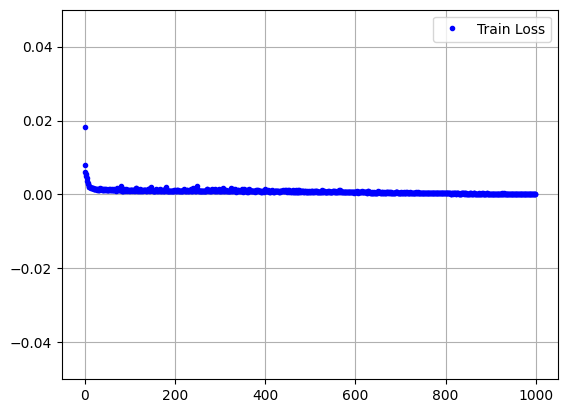

In [40]:
plt.plot(history.epoch, np.array(history.history['loss']), '.b', label='Train Loss')
plt.legend()
plt.grid()
plt.ylim([-0.05, 0.05])
plt.show()

# Comparing RNN and real data

31/31 [==============================] - 0s 698us/step


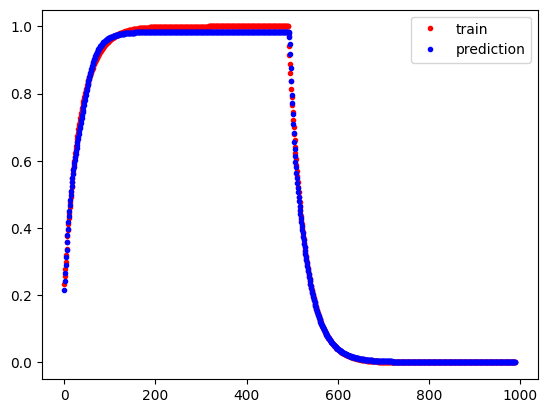

In [47]:
yPred = model.predict(xTrain)
plt.plot(yTrain, '.r', label='train')
plt.plot(yPred, '.b', label='prediction')
plt.legend()
plt.show()

31/31 [==============================] - 0s 645us/step


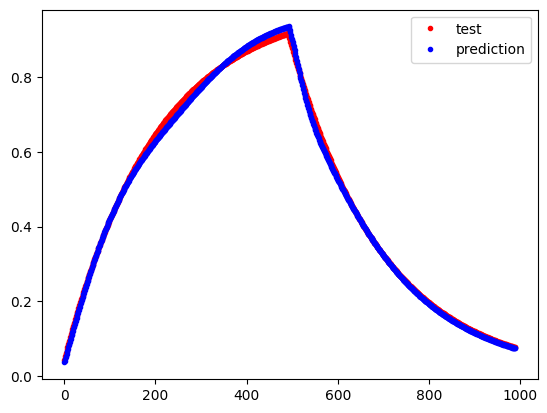

In [42]:
yPredTest = model.predict(xTest)
plt.plot(yTest, '.r', label='test')
plt.plot(yPredTest, '.b', label='prediction')
plt.legend()
plt.show()